# Import Modules

In [ ]:
# drive mount

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# module import

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Preprocessing

In [ ]:
# read the train data

df = pd.read_csv('drive/MyDrive/Project/data/train.csv')
df.set_index('PassengerId',inplace=True) # set PassengerId as the index col
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# show column names

df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.3)

# loading the train data

In [ ]:
# extract the label to train the model at the end

label = df['Survived'].to_numpy()
label.shape

(891,)

In [ ]:
# to see the ratio of victims to survivors

df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

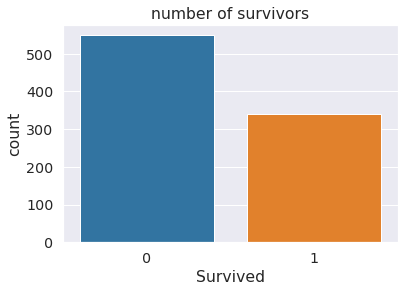

In [ ]:
# plot the number of survivor

fig = sns.countplot(x='Survived', data=df)
plt.title('number of survivors')
plt.show()

# handling null values in each columns

In [ ]:
# to see if there is any null value in each column

df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# deal with null values in Age column
# decided to put the mean value

df[pd.isnull(df.Age)].head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [ ]:
df.Age.median() # df.Age == df['Age']

28.0

In [ ]:
df.Age.fillna(np.mean(df.Age), inplace=True)
df.Age.isnull().sum()

0

In [ ]:
# Since there were too many null values in the Cabin column, had to see whether to exclude the Cabin column

cabin_ratio = df[pd.notnull(df.Cabin)].Pclass.value_counts().to_dict()
cabin_ratio

{1: 176, 2: 16, 3: 12}

In [ ]:
cabin_ratio

{1: 176, 2: 16, 3: 12}

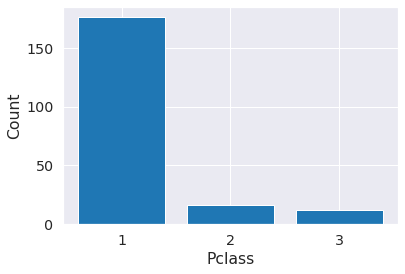

In [ ]:
plt.bar(range(len(cabin_ratio)), list(cabin_ratio.values()), align='center')
plt.xticks(range(len(cabin_ratio)), list(cabin_ratio.keys()))
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [ ]:
# Since most of non-null values in the Cabin column was 1, decided to exclude this column

In [ ]:
# deal with null values in the Fare column
# Although there was no null values, there were 0

len(df[df['Fare']==0])

15

In [ ]:
# Since we are going to use fillna method, 
# replace all the 0 to NaN

df['Fare'] = df['Fare'].replace(0, np.NaN)
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# all the 0 values were changed to NaN

df.Fare.isnull().sum()

15

In [ ]:
df[df.Fare.isnull()].sort_values(['Pclass'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,NaN,B94,S
634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,NaN,NaN,S
807,0,1,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,NaN,A36,S
816,0,1,"Fry, Mr. Richard",male,29.699118,0,0,112058,NaN,B102,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,19972,NaN,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,NaN,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,NaN,NaN,S
467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,NaN,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,NaN,NaN,S


In [ ]:
for i in range(1, 4):
  filt = (df['Pclass'] == i) & (df['Embarked'] == 'S')
  df.loc[filt, 'Fare'] = df.loc[filt, 'Fare'].fillna(df[filt].Fare.median()) # fill with median

In [ ]:
df.Fare.isnull().sum()

0

In [ ]:
# Since there are only two rows that are missing Embarked values,
# decided to drop two rows.

df.dropna(subset=['Embarked'], inplace=True)
df.isnull().sum() # done with handling null values

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

# 

In [ ]:
numeric_col = ['Age','SibSp','Parch','Fare']
category_col = ['Pclass','Sex','Embarked']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


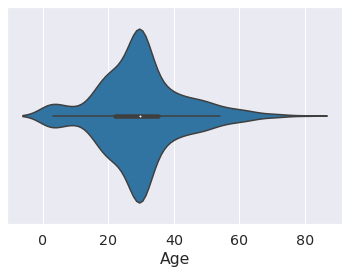

In [ ]:
sns.violinplot(df['Age'])

In [ ]:
df.Age.describe()

count    889.000000
mean      29.653446
std       12.968366
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# Since age was widely distributed,
# created a categorical column

def age_range(df):
  for i in range(7, -1, -1):
    if df >= i * 10:
      return i

In [ ]:
df['Age_Range'] = df.Age.map(age_range)

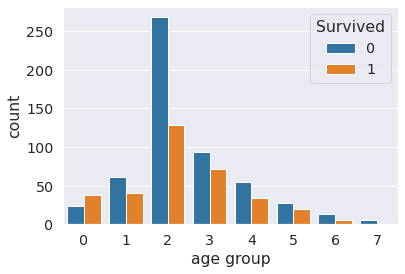

In [ ]:
fig = sns.countplot(x='Age_Range', hue='Survived', data=df)
fig.set(xlabel = 'age group')
plt.show()

In [ ]:
df.Fare.describe()

count    889.000000
mean      32.526345
std       49.591416
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


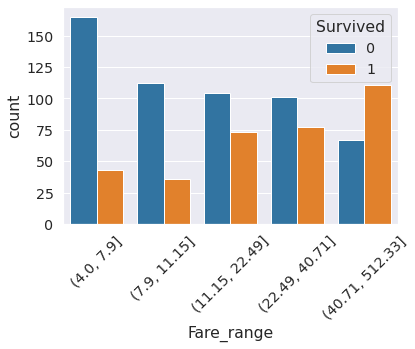

In [ ]:
# Since fare was widely distributed as well
# divided fair into 5 categorical values

df['Fare_range'] = pd.qcut(df.Fare, 5, precision=2)
sns.countplot('Fare_range', hue='Survived', data=df)
plt.xticks(rotation=45) 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


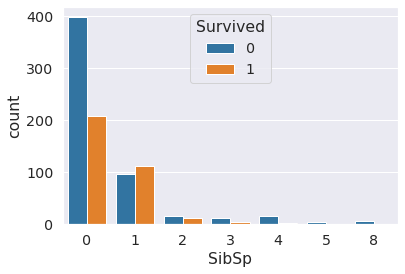

In [ ]:
sns.countplot('SibSp', hue='Survived', data=df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


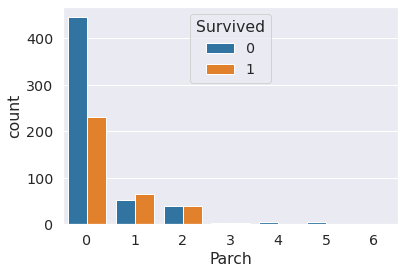

In [ ]:
sns.countplot('Parch', hue='Survived', data=df)
plt.show()

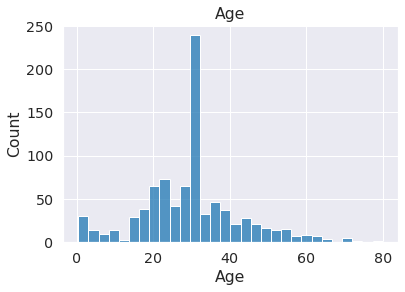

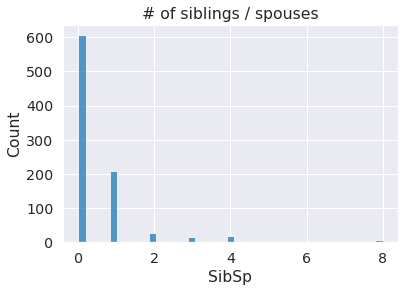

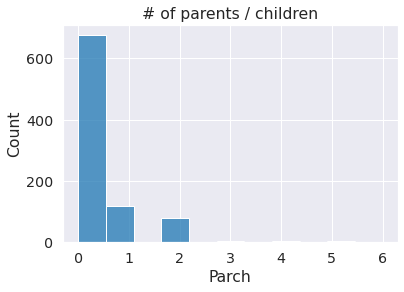

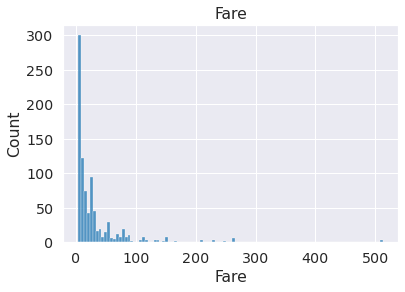

In [ ]:
for col in numeric_col:
  sns.histplot(df[col])
  if col == 'SibSp':
    col = '# of siblings / spouses'
  elif col == 'Parch':
    col = '# of parents / children'
  plt.title(col)
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


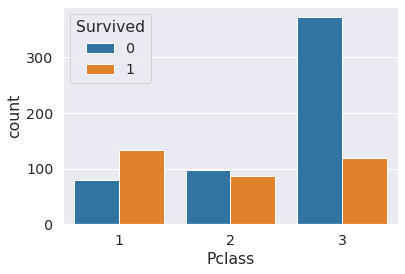

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


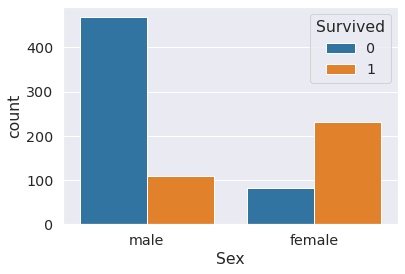

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


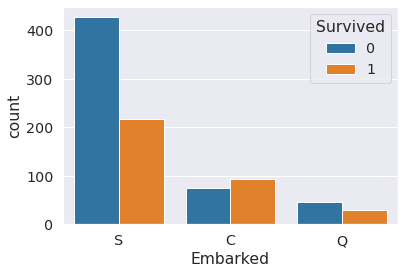

In [ ]:
for col in category_col:
  sns.countplot(col, hue='Survived', data=df)
  plt.show()

In [ ]:
new_df = df.copy()
new_df.drop(columns=['Name', 'Ticket', 'Cabin', 'Age_Range', 'Fare_range'], inplace=True)
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


In [ ]:
# Since Pclass and Embared columns are categorical variables
# convereted to dummy varaibles, so that they can flow to
# a logistic regression model

new_df = pd.get_dummies(new_df, columns=['Pclass', 'Embarked'], prefix=['Pclass', 'Embarked'], drop_first=True)

In [ ]:
new_df['Sex'] = np.where(new_df['Sex'] == 'male', 0, 1)

In [ ]:
new_df

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,0,22.000000,1,0,7.2500,0,1,0,1
2,1,1,38.000000,1,0,71.2833,0,0,0,0
3,1,1,26.000000,0,0,7.9250,0,1,0,1
4,1,1,35.000000,1,0,53.1000,0,0,0,1
5,0,0,35.000000,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,0,27.000000,0,0,13.0000,1,0,0,1
888,1,1,19.000000,0,0,30.0000,0,0,0,1
889,0,1,29.699118,1,2,23.4500,0,1,0,1


In [ ]:
new_df.corr()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
Survived,1.000000,0.541585,-0.074673,-0.034040,0.083151,0.249390,0.095002,-0.320171,0.004536,-0.151777
Sex,0.541585,1.000000,-0.089434,0.116348,0.247508,0.173968,0.066459,-0.134227,0.075217,-0.121405
Age,-0.074673,-0.089434,1.000000,-0.231875,-0.178232,0.091536,0.008416,-0.278527,-0.012823,-0.021589
SibSp,-0.034040,0.116348,-0.231875,1.000000,0.414542,0.157112,-0.056507,0.091515,-0.026692,0.069438
Parch,0.083151,0.247508,-0.178232,0.414542,1.000000,0.213885,-0.001278,0.014634,-0.081585,0.061512
Fare,0.249390,0.173968,0.091536,0.157112,0.213885,1.000000,-0.117416,-0.420972,-0.119603,-0.158761
Pclass_2,0.095002,0.066459,0.008416,-0.056507,-0.001278,-0.117416,1.000000,-0.567432,-0.127705,0.190824
Pclass_3,-0.320171,-0.134227,-0.278527,0.091515,0.014634,-0.420972,-0.567432,1.000000,0.237035,-0.013594
Embarked_Q,0.004536,0.075217,-0.012823,-0.026692,-0.081585,-0.119603,-0.127705,0.237035,1.000000,-0.499261
Embarked_S,-0.151777,-0.121405,-0.021589,0.069438,0.061512,-0.158761,0.190824,-0.013594,-0.499261,1.000000


# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
new_df.head(5)

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,1,26.0,0,0,7.9250,0,1,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,0,35.0,0,0,8.0500,0,1,0,1


In [ ]:
label = new_df['Survived'].to_numpy()
print(label[:5])
print(type(label), label.shape)

[0 1 1 1 0]
<class 'numpy.ndarray'> (889,)


In [ ]:
train_data = new_df.drop(columns=['Survived'])
train_data

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,22.000000,1,0,7.2500,0,1,0,1
2,1,38.000000,1,0,71.2833,0,0,0,0
3,1,26.000000,0,0,7.9250,0,1,0,1
4,1,35.000000,1,0,53.1000,0,0,0,1
5,0,35.000000,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,27.000000,0,0,13.0000,1,0,0,1
888,1,19.000000,0,0,30.0000,0,0,0,1
889,1,29.699118,1,2,23.4500,0,1,0,1


In [ ]:
logReg = LogisticRegression(solver='lbfgs', max_iter=1000)
logReg.fit(train_data, label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logReg.score(train_data, label)

0.8042744656917885

In [ ]:
logReg.coef_

array([[ 2.58431531, -0.03692126, -0.30793111, -0.08540885,  0.00259653,
        -0.75710712, -1.95062058, -0.0342799 , -0.44589532]])

In [ ]:
# Once finished training the model,
# wanted to the model on a train test examples

dfr = pd.read_csv('drive/MyDrive/Project/data/test.csv')
dfr.set_index('PassengerId',inplace=True)

In [ ]:
dfr.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
dfr.isna().sum()
dfr.drop(columns=['Name','Ticket','Cabin'], inplace=True)

In [ ]:
dfr.Age.fillna(dfr.Age.median(),inplace=True)

In [ ]:
new_dfr = dfr.copy()
new_dfr = pd.get_dummies(new_dfr, columns=['Pclass', 'Embarked'], prefix=['Pclass', 'Embarked'], drop_first=True)
new_dfr['Sex'] = np.where(new_dfr['Sex'] == 'male', 0, 1)

In [ ]:
dfr2 = pd.read_csv('drive/MyDrive/Project/data/gender_submission.csv')

In [ ]:
survived = dfr2['Survived'].to_numpy()

In [ ]:
new_dfr.Fare.fillna(new_dfr.Fare.median(), inplace=True)
new_dfr.isnull().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
logReg.score(new_dfr, survived)

0.9449760765550239

In [ ]:
logReg.coef_

array([[ 2.58431531, -0.03692126, -0.30793111, -0.08540885,  0.00259653,
        -0.75710712, -1.95062058, -0.0342799 , -0.44589532]])